In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import user, password, host

In [73]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

1) Spam Data

    a) Load the spam data set.

In [74]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


b) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [75]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [76]:
# create df of spam only
spam = df[df.label == 'spam']
spam

,label,text
id,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...


In [77]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['count', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

,count,percent
ham,4825,0.865937
spam,747,0.134063


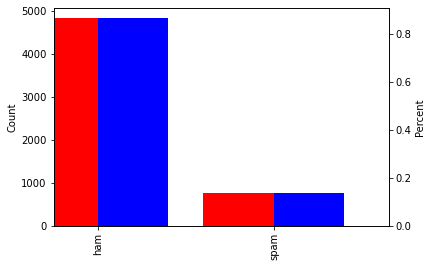

In [93]:
x = show_counts_and_ratios(df, "label")

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
x["count"].plot(kind='bar', color='red', ax=ax, width=width, position=1)
x["percent"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax2.set_ylabel('Percent')

plt.show()

In [90]:
# clean and separate ham/spam words
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [96]:
# frequency
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()

In [97]:
counts = pd.concat([ham_freq, spam_freq], axis=1).fillna(0).astype(int)
counts.columns = ['ham', 'spam']
counts.head()

,ham,spam
i,2305,45
you,1837,287
to,1554,686
the,1118,204
a,1055,376


In [101]:
counts.ham.sort_values(ascending=False).head()

i      2305
you    1837
to     1554
the    1118
a      1055
Name: ham, dtype: int64

In [102]:
counts.spam.sort_values(ascending=False).head()

to      686
a       376
call    347
you     287
your    263
Name: spam, dtype: int64

In [108]:
# highest frequency 'spam' words that don't appear in 'ham'
counts[counts.ham==0].sort_values('spam', ascending=False).head(10)

,ham,spam
claim,0,113
prize,0,92
won,0,73
guaranteed,0,50
tone,0,48
18,0,43
awarded,0,38
a1000,0,35
150ppm,0,34
a2000,0,31


In [111]:
# highest frequency 'ham' words that don't appear in 'spam'
counts[counts.spam==0].sort_values('ham', ascending=False).head(10)

,ham,spam
ltgt,276,0
he,184,0
lor,160,0
later,134,0
da,131,0
she,130,0
thats,94,0
say,91,0
ask,88,0
said,86,0


In [ ]:
bigrams = nltk.ngrams(ham_words.split(), 2)
list(bigrams)[:10]

In [79]:
top_15_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(15))

top_15_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(you, are)     91
dtype: int64

In [45]:
bigrams = nltk.ngrams(spam_words.split(), 2)
list(bigrams)[:10]

[('free', 'entry'),
 ('entry', 'in'),
 ('in', '2'),
 ('2', 'a'),
 ('a', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'to'),
 ('to', 'win'),
 ('win', 'fa'),
 ('fa', 'cup')]

In [80]:
top_15_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                      .head(15))

top_15_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(you, are)     91
dtype: int64

In [41]:
from wordcloud import WordCloud

In [42]:
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

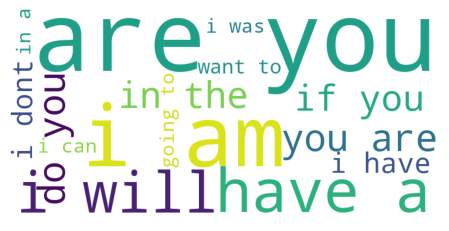

In [44]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_15_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

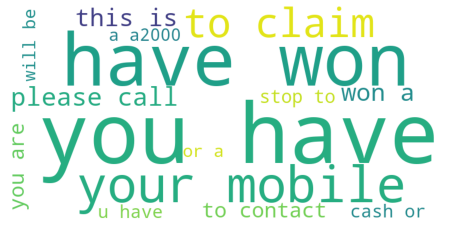

In [47]:
data = {k[0] + ' ' + k[1]: v for k, v in top_15_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

c) Is there any overlap in the bigrams for the spam data and the ham data?

In [48]:
# there doesn't appear to be much overlap.  The direction of the conversation appears to be oppositie with the ham data referencing I and the spam you more frequently.  

d) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [117]:
top_10_ham_trigrams = nltk.ngrams(ham_words.split(), 3)
list(top_10_ham_trigrams)[:10]

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world')]

In [123]:
top_10_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                      .head(10))

top_10_ham_trigrams.head()

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
dtype: int64

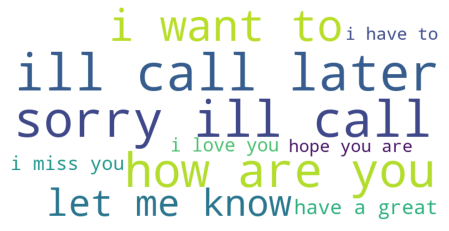

In [126]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_10_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [124]:
top_10_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                      .head(10))

top_10_spam_trigrams.head()

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(urgent, your, mobile)       18
dtype: int64

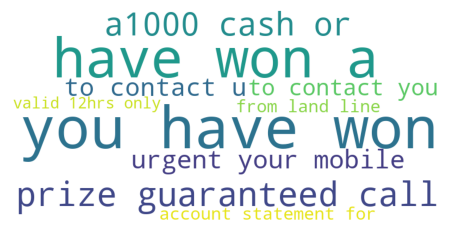

In [125]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_10_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()